# Data preparation
- Data Cleansing
    + Errors from data entry
    + Physically impossible values
    + Missing values
    + Outliers
    + Spaces, typos
    + Errors against codebook
- Data Transforming
    + Aggregating data
    + Extrapolating data
    + Derived measures
    + Creating dummies
    + Reducing number of variables
- Data Integrating
    + Merging/join data sets
    + Set operators
    + Creating views

In [60]:
import pandas as pd
import glob
from datetime import datetime 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
import math
import re
from collections import deque
plt.style.use('ggplot')

# Data Integrating

In [61]:
import pandas as pd
import os

gold_df = pd.read_csv('https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_fed_and_gold/Gold.csv')  
files_to_merge = ['https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/copper.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/crude_oil.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/DXY.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/EURUSD.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/MSCI.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/NASDAQ.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/NLR.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/platinum.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/rice.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/RUT.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/silver.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/SP500.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_13_features/VIX.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/crawl/crawl_fed_and_gold/FED.csv',
                  ]  

gold_df['date'] = pd.to_datetime(gold_df['date'], format='%d/%m/%Y')

merged_data = gold_df

for file in files_to_merge:
    df = pd.read_csv(f'{file}')
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    merged_data = pd.merge(merged_data, df, on='date', how='left')
merged_data .rename(columns = {'Open': 'GOLD_open',
                              'High': 'GOLD_high',
                              'Close': 'GOLD_close',
                              'Low': 'GOLD_low',
                              'date': 'Date'} ,inplace=True)
merged_data = merged_data.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'])

In [62]:
merged_data

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,rice,RUT,silver,SP500,VIX,FED
0,2023-11-24,1991.2,2004.5,1990.9,2003.0,3.7965,75.54,103.40,1.0906,528.35,14250.85,75.21,931.1,1756.5,1807.50,24.329,4559.34,12.46,NaN
1,2023-11-22,1999.1,1999.4,1991.0,1991.4,3.7665,77.10,103.92,1.0918,523.97,14265.86,74.94,924.6,1730.0,1795.54,23.672,4556.62,12.85,NaN
2,2023-11-21,1990.7,2005.5,1988.5,1999.3,3.8145,77.77,103.57,1.0946,524.89,14199.98,74.50,940.0,1750.0,1783.26,23.843,4538.19,13.35,NaN
3,2023-11-20,1978.7,1979.4,1969.7,1977.7,3.8125,77.60,103.47,1.0907,522.21,14284.53,75.09,921.5,1739.5,1807.08,23.579,4547.38,13.41,NaN
4,2023-11-17,1982.5,1984.0,1979.8,1981.6,3.7375,75.89,103.82,1.0854,521.42,14125.48,74.22,894.7,1740.5,1797.77,23.809,4514.02,13.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,2010-04-07,1152.2,1152.3,1144.0,1152.2,3.5810,85.39,81.53,1.3361,37.31,2431.16,69.75,1711.1,1300.0,699.46,18.116,1182.45,16.62,NaN
3443,2010-04-06,1152.3,1153.0,1132.6,1152.3,3.5920,85.88,81.44,1.3348,37.37,2436.81,70.59,1717.2,1297.0,701.48,18.185,1189.44,16.23,NaN
3444,2010-04-05,1130.8,1138.5,1122.7,1135.1,3.6095,86.84,81.39,1.3402,36.98,2429.53,70.44,1698.5,1297.5,697.65,17.917,1187.44,17.02,NaN
3445,2010-04-04,1122.3,1133.3,1119.9,1132.9,3.6260,86.62,81.09,1.3489,NaN,NaN,NaN,1703.8,1265.5,NaN,18.104,NaN,NaN,NaN


In [63]:
merged_data.columns

Index(['Date', 'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'copper',
       'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'platinum',
       'rice', 'RUT', 'silver', 'SP500', 'VIX', 'FED'],
      dtype='object')

In [64]:
rows, cols = merged_data.shape
print("There are {} rows.".format(rows))
print("There are {} columns.".format(cols))

There are 3447 rows.
There are 19 columns.


In [65]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3447 entries, 0 to 3446
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3447 non-null   datetime64[ns]
 1   GOLD_open   3447 non-null   float64       
 2   GOLD_high   3447 non-null   float64       
 3   GOLD_low    3447 non-null   float64       
 4   GOLD_close  3447 non-null   float64       
 5   copper      3447 non-null   float64       
 6   crude_oil   3447 non-null   float64       
 7   DXY         3434 non-null   float64       
 8   EURUSD      3385 non-null   float64       
 9   MSCI        2957 non-null   float64       
 10  NASDAQ      2957 non-null   float64       
 11  NLR         2957 non-null   float64       
 12  platinum    3431 non-null   float64       
 13  rice        3435 non-null   float64       
 14  RUT         2957 non-null   float64       
 15  silver      3447 non-null   float64       
 16  SP500       2957 non-nul

In [66]:
dd = merged_data.drop(['Date'], axis = 1)

In [67]:
dd.describe().drop(['25%', '50%', '75%']).transpose()

,count,mean,std,min,max
GOLD_open,3447.0,1487.454714,266.665959,1053.7000,2053.6000
GOLD_high,3447.0,1494.809951,268.289656,1062.0000,2072.0000
GOLD_low,3447.0,1479.660865,265.049415,1046.2000,2040.0000
GOLD_close,3447.0,1487.344328,266.686281,1050.8000,2051.5000
copper,3447.0,3.249953,0.670830,1.9395,4.9290
crude_oil,3447.0,71.595176,22.300616,-37.6300,123.7000
DXY,3434.0,91.464490,9.050576,72.9300,114.1100
EURUSD,3385.0,1.195509,0.112367,0.9596,1.4844
MSCI,2957.0,190.732858,187.304222,25.5900,675.1500
NASDAQ,2957.0,6976.698394,3908.797245,2093.8800,16057.4400


<Axes: >

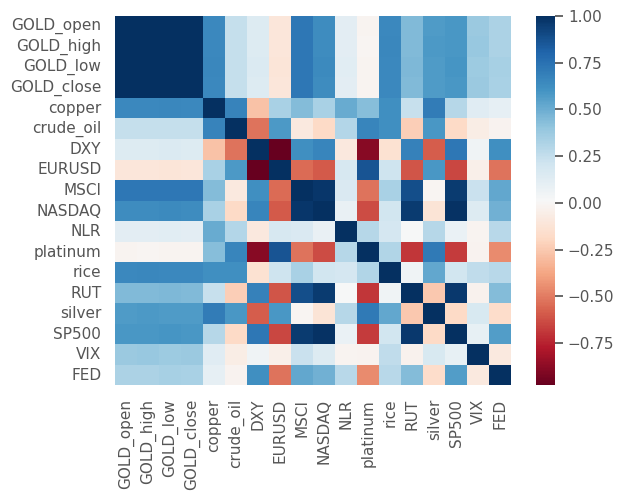

In [68]:
sns.heatmap(dd.corr(), cmap="RdBu")

# Data preprocessing

## 1. Evaluating Target Variables

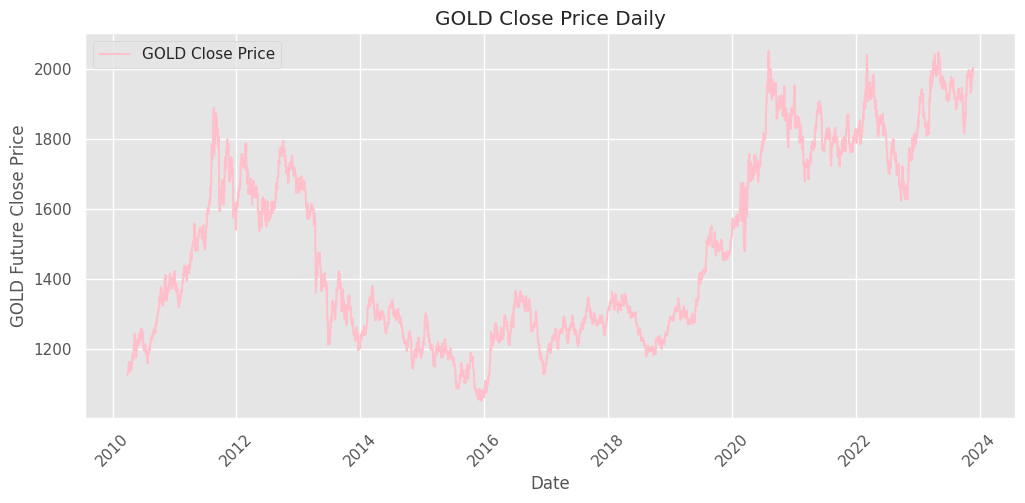

In [69]:
import matplotlib.pyplot as plt

# Assuming merged_data['Date'] is in datetime format
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(merged_data['Date'], merged_data['GOLD_close'], color='pink', label='GOLD Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('GOLD Future Close Price')
ax.set_title('GOLD Close Price Daily')
ax.grid(True)
ax.legend()
ax.tick_params(axis='x', rotation=45)

plt.show()


In [70]:
merged_data['GOLD_close'].describe()

count    3447.000000
mean     1487.344328
std       266.686281
min      1050.800000
25%      1256.800000
50%      1386.800000
75%      1737.650000
max      2051.500000
Name: GOLD_close, dtype: float64

In [71]:
print("Number of records with NULL price: ", merged_data['GOLD_close'].isna().sum())

Number of records with NULL price:  0


### Before clipping the values of the target variables

Skewness:  0.37149699277021525


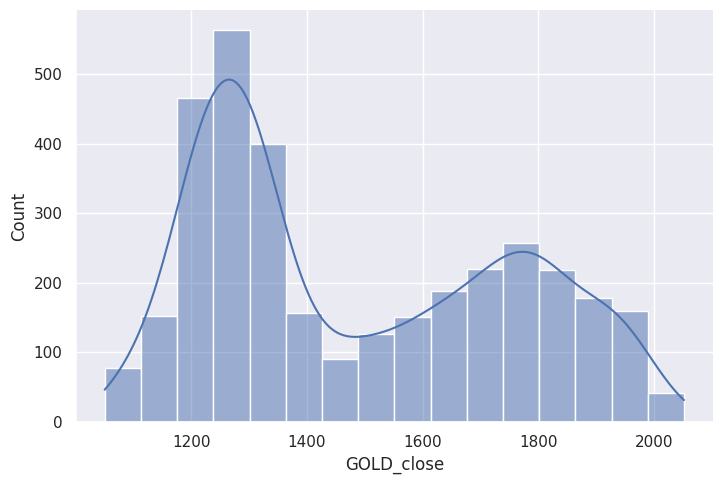

In [72]:
sns.set_theme()
price_dist = sns.displot(merged_data['GOLD_close'], kde=True)
price_dist.fig.set_size_inches(8,5)
print("Skewness: ", merged_data['GOLD_close'].skew())

## 2. Handling NULL Values

### NULL values

In [73]:
null_count_arr = merged_data.isna().sum().sort_values(ascending=False)
null_count_arr

FED           3337
NASDAQ         490
VIX            490
SP500          490
RUT            490
NLR            490
MSCI           490
EURUSD          62
platinum        16
DXY             13
rice            12
GOLD_open        0
crude_oil        0
copper           0
GOLD_close       0
silver           0
GOLD_low         0
GOLD_high        0
Date             0
dtype: int64

Text(0.5, 1.0, 'Percentage of Missing Values by Features')

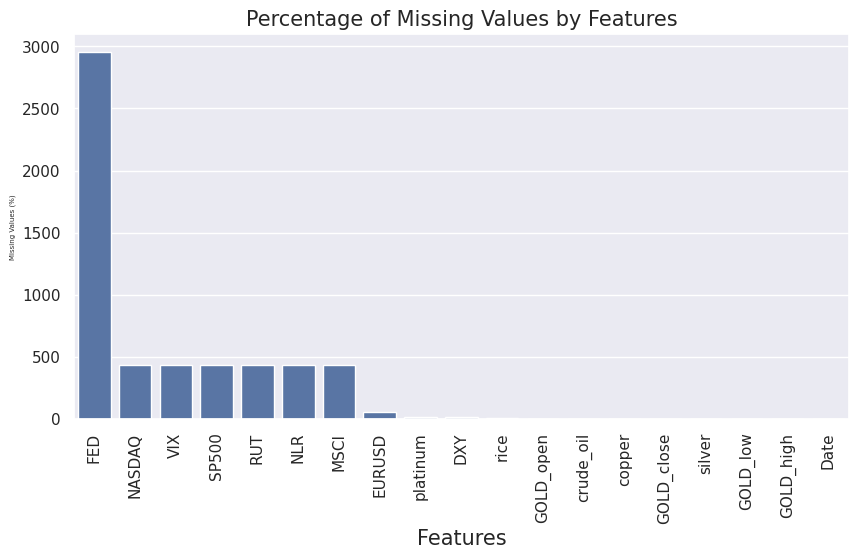

In [74]:
# plot the distribution of missing values by 24 features 
null_ratio = (null_count_arr.sort_values(ascending=False)[:24]/df.shape[0])*100
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
sns.barplot(x = null_ratio.index, y = null_ratio)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Missing Values (%)', fontsize = 5)
plt.title('Percentage of Missing Values by Features', fontsize = 15)

By observing the above information, we realize there are two problems with NULL data.
- First Problem (FED with Monthly Frequency):
    + Issue: FED has the most NULL values because FED has a Monthly Frequency.

    + Solution: Because the frequency is monthly, you assume the entire month has the same transaction value based on the 30-day FED futures market prices.

    + Implementation:
        - Identify the NULL values in the 'FED' column.
        - Fill those NULL values with the average or some representative value for the month, for example, the average value for the 30-day FED futures market prices.
- Second Problem (Weekly Features and Some GOLD Features):
    + Issue: Some GOLD features lose data on Saturday and Sunday, and some weekly features only lose data on Saturday and Friday. Other features mostly lose data on Saturday and Sunday.

    + Solution: For missing data, set the value equal to the value of the previous date.

    + Implementation:

        - Identify the columns with missing values related to the second problem.
        - Use the fillna method to fill missing values with the previous value in the column. 

        
- Firstly: FED has the most NULL values because FED has the Monthly Frequency. => Solution: Because frequency is monthly, we assume the entire month has the same transaction value (Dựa trên giá cả Thị trường Kỳ hạn FED 30-ngày)
- Secondly: some GOLD features only lose data on the Saturday and Sunday, and some weekly features only lose data on Saturday and Friday. As for other features, most of them are lose in Saturday and Sunday (Explain that there are holidays or trading schedules adjusted on the futures exchange) => Solution: With lose data, the value is equal to the value of the previous date.


In [75]:
import pandas as pd
null_data = merged_data.copy()
null_data['DayOfWeek'] = merged_data['Date'].dt.day_name()

null_values_by_day = null_data.groupby('DayOfWeek').apply(lambda x: x.isnull().sum())

# In kết quả
print("Số giá trị null theo ngày:")
print(null_values_by_day)


Số giá trị null theo ngày:
           Date  GOLD_open  GOLD_high  GOLD_low  GOLD_close  copper  \
DayOfWeek                                                             
Friday        0          0          0         0           0       0   
Monday        0          0          0         0           0       0   
Sunday        0          0          0         0           0       0   
Thursday      0          0          0         0           0       0   
Tuesday       0          0          0         0           0       0   
Wednesday     0          0          0         0           0       0   

           crude_oil  DXY  EURUSD  MSCI  NASDAQ  NLR  platinum  rice  RUT  \
DayOfWeek                                                                   
Friday             0    0       0     0       0    0         2     0    0   
Monday             0    0       2    35      35   35         1     2   35   
Sunday             0   13      57   447     447  447         0     1  447   
Thursday           

### First Problem (FED with Monthly Frequency)

In [76]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=30) 

column_to_impute = merged_data['FED'].values.reshape(-1, 1)

imputed_column = imputer.fit_transform(column_to_impute)

merged_data['FED'] = imputed_column.flatten()

merged_data

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,rice,RUT,silver,SP500,VIX,FED
0,2023-11-24,1991.2,2004.5,1990.9,2003.0,3.7965,75.54,103.40,1.0906,528.35,14250.85,75.21,931.1,1756.5,1807.50,24.329,4559.34,12.46,1.093182
1,2023-11-22,1999.1,1999.4,1991.0,1991.4,3.7665,77.10,103.92,1.0918,523.97,14265.86,74.94,924.6,1730.0,1795.54,23.672,4556.62,12.85,1.093182
2,2023-11-21,1990.7,2005.5,1988.5,1999.3,3.8145,77.77,103.57,1.0946,524.89,14199.98,74.50,940.0,1750.0,1783.26,23.843,4538.19,13.35,1.093182
3,2023-11-20,1978.7,1979.4,1969.7,1977.7,3.8125,77.60,103.47,1.0907,522.21,14284.53,75.09,921.5,1739.5,1807.08,23.579,4547.38,13.41,1.093182
4,2023-11-17,1982.5,1984.0,1979.8,1981.6,3.7375,75.89,103.82,1.0854,521.42,14125.48,74.22,894.7,1740.5,1797.77,23.809,4514.02,13.80,1.093182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,2010-04-07,1152.2,1152.3,1144.0,1152.2,3.5810,85.39,81.53,1.3361,37.31,2431.16,69.75,1711.1,1300.0,699.46,18.116,1182.45,16.62,1.093182
3443,2010-04-06,1152.3,1153.0,1132.6,1152.3,3.5920,85.88,81.44,1.3348,37.37,2436.81,70.59,1717.2,1297.0,701.48,18.185,1189.44,16.23,1.093182
3444,2010-04-05,1130.8,1138.5,1122.7,1135.1,3.6095,86.84,81.39,1.3402,36.98,2429.53,70.44,1698.5,1297.5,697.65,17.917,1187.44,17.02,1.093182
3445,2010-04-04,1122.3,1133.3,1119.9,1132.9,3.6260,86.62,81.09,1.3489,NaN,NaN,NaN,1703.8,1265.5,NaN,18.104,NaN,NaN,1.093182


### Second Problem (Weekly Features and Some GOLD Features)

In [77]:
merged_data.fillna(method='ffill', inplace=True)
merged_data


/tmp/ipykernel_17073/285262041.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,rice,RUT,silver,SP500,VIX,FED
0,2023-11-24,1991.2,2004.5,1990.9,2003.0,3.7965,75.54,103.40,1.0906,528.35,14250.85,75.21,931.1,1756.5,1807.50,24.329,4559.34,12.46,1.093182
1,2023-11-22,1999.1,1999.4,1991.0,1991.4,3.7665,77.10,103.92,1.0918,523.97,14265.86,74.94,924.6,1730.0,1795.54,23.672,4556.62,12.85,1.093182
2,2023-11-21,1990.7,2005.5,1988.5,1999.3,3.8145,77.77,103.57,1.0946,524.89,14199.98,74.50,940.0,1750.0,1783.26,23.843,4538.19,13.35,1.093182
3,2023-11-20,1978.7,1979.4,1969.7,1977.7,3.8125,77.60,103.47,1.0907,522.21,14284.53,75.09,921.5,1739.5,1807.08,23.579,4547.38,13.41,1.093182
4,2023-11-17,1982.5,1984.0,1979.8,1981.6,3.7375,75.89,103.82,1.0854,521.42,14125.48,74.22,894.7,1740.5,1797.77,23.809,4514.02,13.80,1.093182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,2010-04-07,1152.2,1152.3,1144.0,1152.2,3.5810,85.39,81.53,1.3361,37.31,2431.16,69.75,1711.1,1300.0,699.46,18.116,1182.45,16.62,1.093182
3443,2010-04-06,1152.3,1153.0,1132.6,1152.3,3.5920,85.88,81.44,1.3348,37.37,2436.81,70.59,1717.2,1297.0,701.48,18.185,1189.44,16.23,1.093182
3444,2010-04-05,1130.8,1138.5,1122.7,1135.1,3.6095,86.84,81.39,1.3402,36.98,2429.53,70.44,1698.5,1297.5,697.65,17.917,1187.44,17.02,1.093182
3445,2010-04-04,1122.3,1133.3,1119.9,1132.9,3.6260,86.62,81.09,1.3489,36.98,2429.53,70.44,1703.8,1265.5,697.65,18.104,1187.44,17.02,1.093182


In [78]:
# Verify the changes
null_count_arr_after_fill = merged_data.isna().sum().sort_values(ascending=False)
print(null_count_arr_after_fill)

Date          0
NASDAQ        0
VIX           0
SP500         0
silver        0
RUT           0
rice          0
platinum      0
NLR           0
MSCI          0
GOLD_open     0
EURUSD        0
DXY           0
crude_oil     0
copper        0
GOLD_close    0
GOLD_low      0
GOLD_high     0
FED           0
dtype: int64


### Distribution of Columns

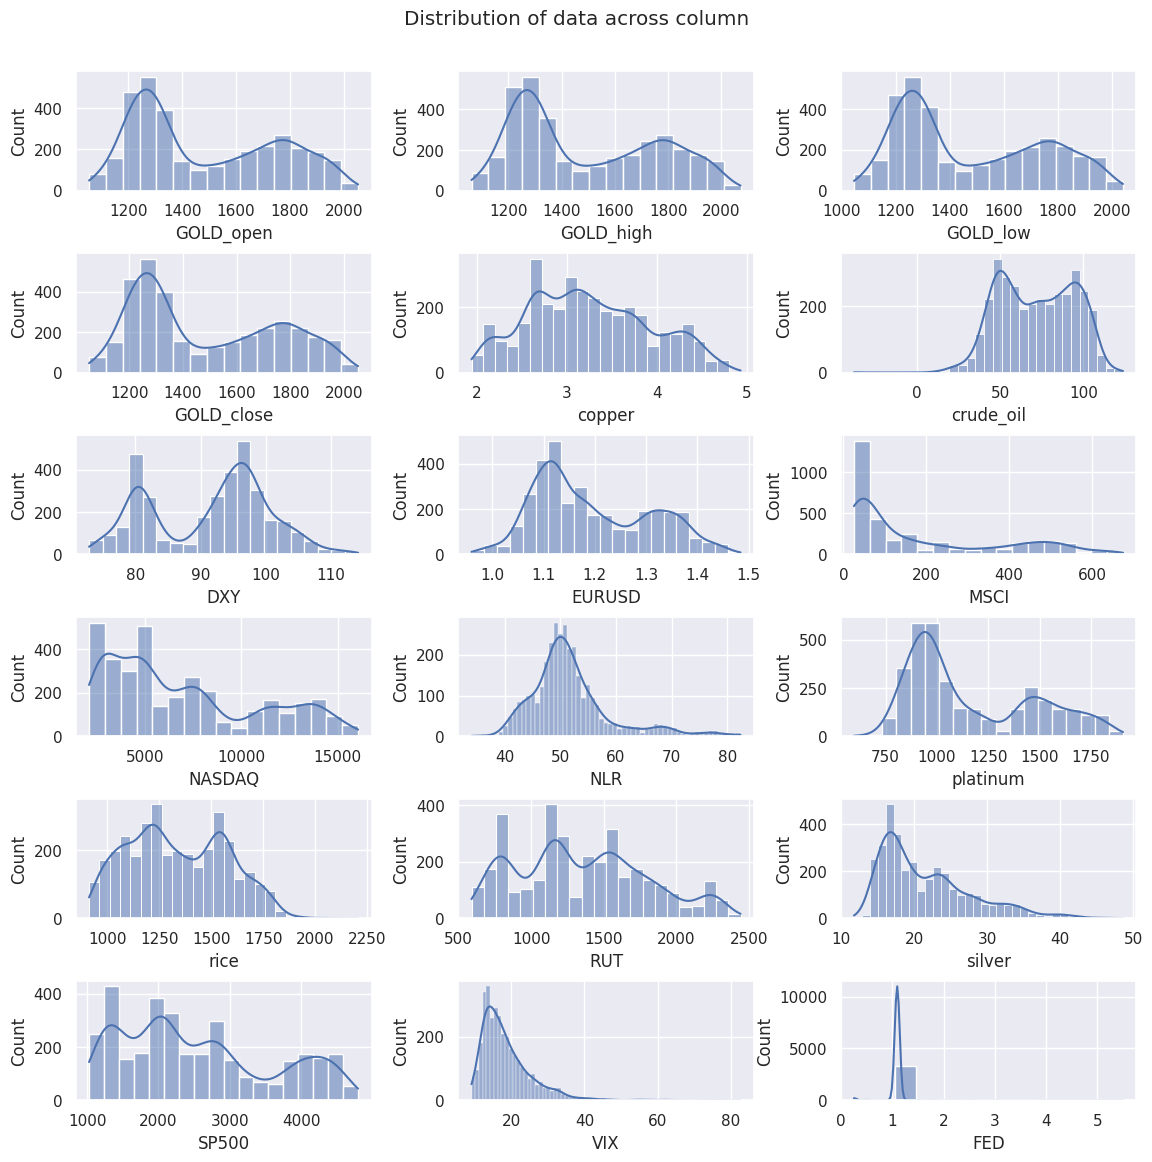

In [79]:
fig = plt.figure(figsize=(12, 12)) 
 
fig.suptitle('Distribution of data across column')
temp = merged_data.drop("Date", axis=1).columns.tolist()

cols = 3
rows = (len(temp) + cols - 1) // cols  

for i, item in enumerate(temp):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data=merged_data, x=item, kde=True)

plt.tight_layout(pad=2.0, w_pad=0.1, h_pad=0.5)  
plt.show()

## 3. Correlation Analysis

<Axes: >

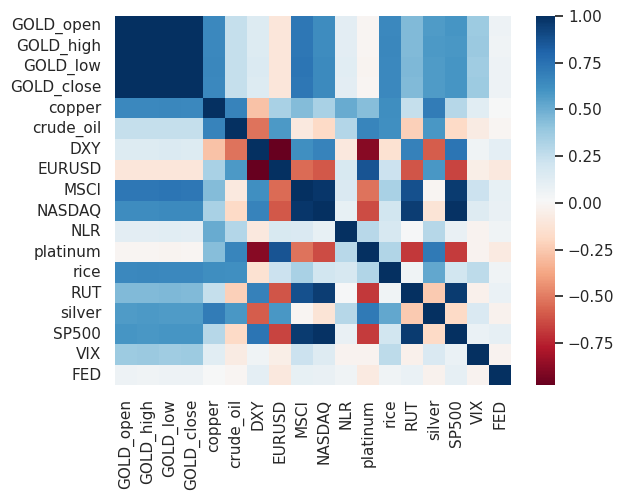

In [80]:
ds = merged_data.set_index('Date') 
sns.heatmap(ds.corr(), cmap="RdBu")

In [81]:
# Retrieve the number of categorical fields and numerical fields
# field indices where column is categorical
categorical_col_idx = np.where(ds.dtypes == object)[0]
# field indices where column is numerical
numerical_col_idx = np.where(ds.dtypes != object)[0]
print("Number of categorical fields: ", categorical_col_idx.shape[0])
print("Number of numerical fields: ", numerical_col_idx.shape[0])

Number of categorical fields:  0
Number of numerical fields:  18


### Handling Outliers 

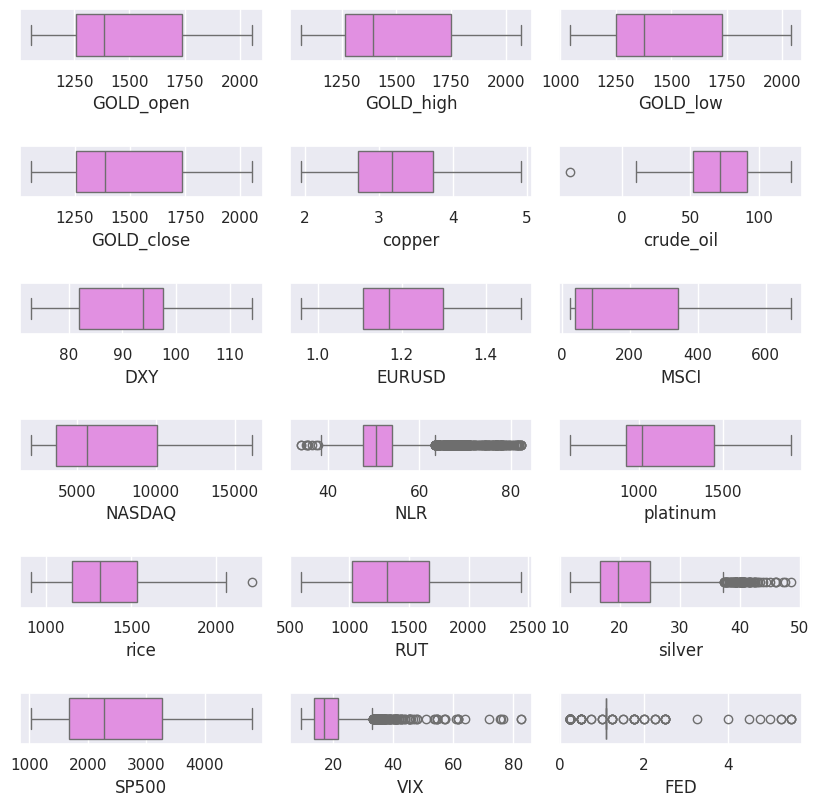

In [82]:
fig = plt.figure(figsize=(8, 8))
temp = merged_data.drop("Date", axis=1).columns.tolist()
cols = 3
rows = (len(temp) + cols - 1) // cols  

for i, item in enumerate(temp):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data=merged_data, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [83]:
merged_data.drop("FED", axis=1,
             inplace=True)
merged_data

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,rice,RUT,silver,SP500,VIX
0,2023-11-24,1991.2,2004.5,1990.9,2003.0,3.7965,75.54,103.40,1.0906,528.35,14250.85,75.21,931.1,1756.5,1807.50,24.329,4559.34,12.46
1,2023-11-22,1999.1,1999.4,1991.0,1991.4,3.7665,77.10,103.92,1.0918,523.97,14265.86,74.94,924.6,1730.0,1795.54,23.672,4556.62,12.85
2,2023-11-21,1990.7,2005.5,1988.5,1999.3,3.8145,77.77,103.57,1.0946,524.89,14199.98,74.50,940.0,1750.0,1783.26,23.843,4538.19,13.35
3,2023-11-20,1978.7,1979.4,1969.7,1977.7,3.8125,77.60,103.47,1.0907,522.21,14284.53,75.09,921.5,1739.5,1807.08,23.579,4547.38,13.41
4,2023-11-17,1982.5,1984.0,1979.8,1981.6,3.7375,75.89,103.82,1.0854,521.42,14125.48,74.22,894.7,1740.5,1797.77,23.809,4514.02,13.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,2010-04-07,1152.2,1152.3,1144.0,1152.2,3.5810,85.39,81.53,1.3361,37.31,2431.16,69.75,1711.1,1300.0,699.46,18.116,1182.45,16.62
3443,2010-04-06,1152.3,1153.0,1132.6,1152.3,3.5920,85.88,81.44,1.3348,37.37,2436.81,70.59,1717.2,1297.0,701.48,18.185,1189.44,16.23
3444,2010-04-05,1130.8,1138.5,1122.7,1135.1,3.6095,86.84,81.39,1.3402,36.98,2429.53,70.44,1698.5,1297.5,697.65,17.917,1187.44,17.02
3445,2010-04-04,1122.3,1133.3,1119.9,1132.9,3.6260,86.62,81.09,1.3489,36.98,2429.53,70.44,1703.8,1265.5,697.65,18.104,1187.44,17.02


## 5. Feature Engineering

### Preparing X and y to do train test split

In [84]:
# select the features and target variable
from sklearn.model_selection import train_test_split

X = merged_data.drop(['Date', 'GOLD_close'], axis=1)
 
y = merged_data['GOLD_close']
# dividing dataset in to train test
x_train, x_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)

## 6. Feature Selection

Using the "Extra Trees Regressor" tool of the Scikitlearn library to create a graph that visually shows the importance of the independent variables X to the dependent variable Y in the forecasting model

In [85]:
from sklearn.ensemble import ExtraTreesRegressor

feat_selection = ExtraTreesRegressor()
feat_selection.fit(X,y)

ExtraTreesRegressor()

In [86]:
print(feat_selection.feature_importances_)

[3.10394899e-01 2.96312713e-01 3.08799475e-01 1.32525563e-03
 3.78335051e-05 3.00117729e-05 1.89577918e-04 5.62034140e-02
 1.05976291e-02 5.75503391e-05 4.58780056e-05 7.85667123e-05
 4.87519030e-04 1.83089092e-03 1.34473308e-02 1.61454810e-04]


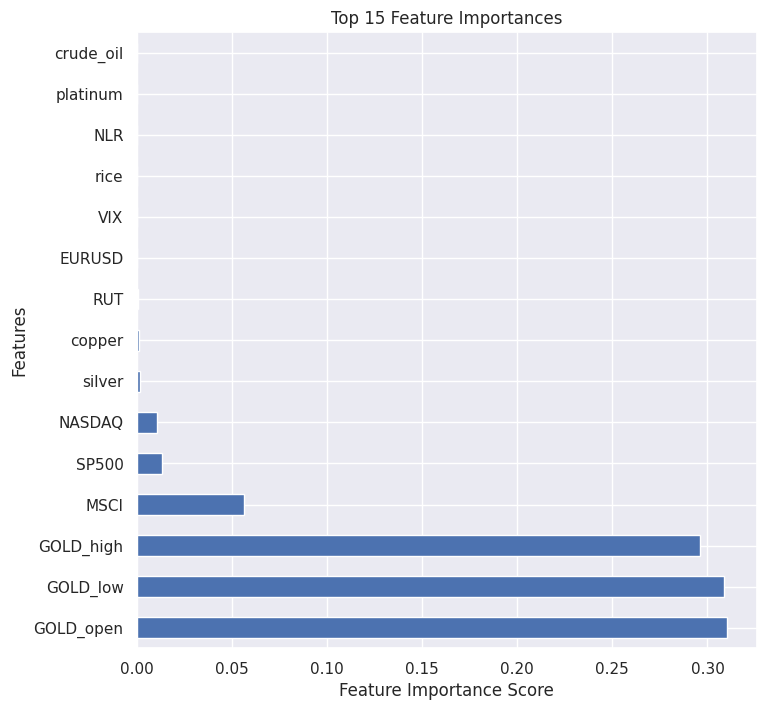

In [87]:
feat_importances = pd.Series(feat_selection.feature_importances_, index=X.columns)

# Set the figure size
plt.figure(figsize=(8, 8)) 

# Plot the horizontal bar chart
feat_importances.nlargest(15).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 15 Feature Importances')
plt.show()

In [88]:
merged_data

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,rice,RUT,silver,SP500,VIX
0,2023-11-24,1991.2,2004.5,1990.9,2003.0,3.7965,75.54,103.40,1.0906,528.35,14250.85,75.21,931.1,1756.5,1807.50,24.329,4559.34,12.46
1,2023-11-22,1999.1,1999.4,1991.0,1991.4,3.7665,77.10,103.92,1.0918,523.97,14265.86,74.94,924.6,1730.0,1795.54,23.672,4556.62,12.85
2,2023-11-21,1990.7,2005.5,1988.5,1999.3,3.8145,77.77,103.57,1.0946,524.89,14199.98,74.50,940.0,1750.0,1783.26,23.843,4538.19,13.35
3,2023-11-20,1978.7,1979.4,1969.7,1977.7,3.8125,77.60,103.47,1.0907,522.21,14284.53,75.09,921.5,1739.5,1807.08,23.579,4547.38,13.41
4,2023-11-17,1982.5,1984.0,1979.8,1981.6,3.7375,75.89,103.82,1.0854,521.42,14125.48,74.22,894.7,1740.5,1797.77,23.809,4514.02,13.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,2010-04-07,1152.2,1152.3,1144.0,1152.2,3.5810,85.39,81.53,1.3361,37.31,2431.16,69.75,1711.1,1300.0,699.46,18.116,1182.45,16.62
3443,2010-04-06,1152.3,1153.0,1132.6,1152.3,3.5920,85.88,81.44,1.3348,37.37,2436.81,70.59,1717.2,1297.0,701.48,18.185,1189.44,16.23
3444,2010-04-05,1130.8,1138.5,1122.7,1135.1,3.6095,86.84,81.39,1.3402,36.98,2429.53,70.44,1698.5,1297.5,697.65,17.917,1187.44,17.02
3445,2010-04-04,1122.3,1133.3,1119.9,1132.9,3.6260,86.62,81.09,1.3489,36.98,2429.53,70.44,1703.8,1265.5,697.65,18.104,1187.44,17.02


# Finishing Touch

In [89]:

# Specify a different directory with write permissions
output_directory = os.path.expanduser("crawl/data_preparation")
os.makedirs(output_directory, exist_ok=True)

# Create 'data_preparation.csv' file
output_file_path = os.path.join(output_directory, 'data_preparation.csv')
merged_data.to_csv(output_file_path, index=False)

print(f'The merged data is saved to: {output_file_path}')

The merged data is saved to: crawl/data_preparation/data_preparation.csv
